# Imports

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as m_dates

from typing import Optional, Union
from datetime import datetime
from matplotlib.ticker import PercentFormatter

# Data Loading

In [426]:
u_data_columns_name = ['user_id', 'item_id', 'rating', 'timestamp']
u_data = pd.read_csv("../data/raw/ml-100k/u.data", sep="\t", names=u_data_columns_name)
u_data['timestamp'] = pd.to_datetime(u_data['timestamp'], unit='s')

u_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [427]:
u_item_columns = [
    'item_id', 'movie_title', 'release date', 'video release date',
    'IMDb URL', 'unknown', 'Action', 'Adventure',
    'Animation', "Children", 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', "Film-Noir",
    'Horror', 'Musical', 'Mystery', 'Romance',
    'Sci-Fi', 'Thriller', 'War', 'Western'
]
u_item = pd.read_csv("../data/raw/ml-100k/u.item", sep="|", names=u_item_columns, encoding='iso-8859-1')

u_item.head()

,item_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [428]:
u_user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip code']
u_user = pd.read_csv("../data/raw/ml-100k/u.user", sep="|", names=u_user_columns)

u_user.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Distributions

In [429]:
print('Unique users:', len(u_data.user_id.unique()))
print('Unique items:', len(u_data.item_id.unique()))

Unique users: 943
Unique items: 1682


In [430]:
def plot_dist(values: pd.Series,
              title: str,
              x_label: str,
              step: float = 0.05,
              values_range: Optional[tuple[float, float]] = None):
    if not values_range:
        values_range = (0, 1)
    is_datetime_type = pd.api.types.is_datetime64_ns_dtype(values.dtype)

    if is_datetime_type:
        values = m_dates.date2num(values.to_numpy())
    else:
        values = values.to_numpy()

    bins = np.arange(values_range[0], values_range[1] + step, step)

    fig: plt.Figure
    ax: plt.Axes
    fig, ax = plt.subplots(figsize=(12, 4))

    ax.hist(values, bins=bins, weights=np.ones_like(values) / float(len(values)))
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

    if is_datetime_type:
        ax.xaxis.set_major_locator(m_dates.YearLocator())
        ax.xaxis.set_major_formatter(m_dates.DateFormatter('%d.%m.%y'))
        for label in ax.get_xticklabels(which='major'):
            label.set(rotation=45, horizontalalignment='right')

    ax.set_xticks(bins)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    plt.show()

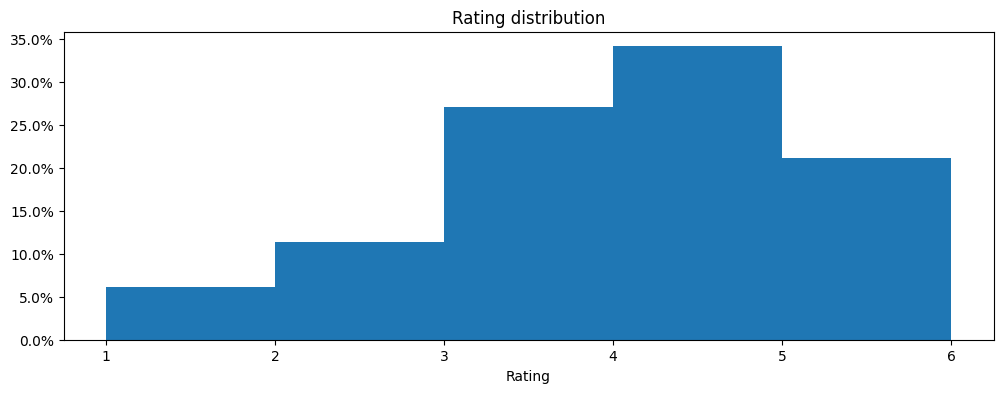

In [431]:
plot_dist(u_data.rating, 'Rating distribution', 'Rating', step=1, values_range=(1, 6))

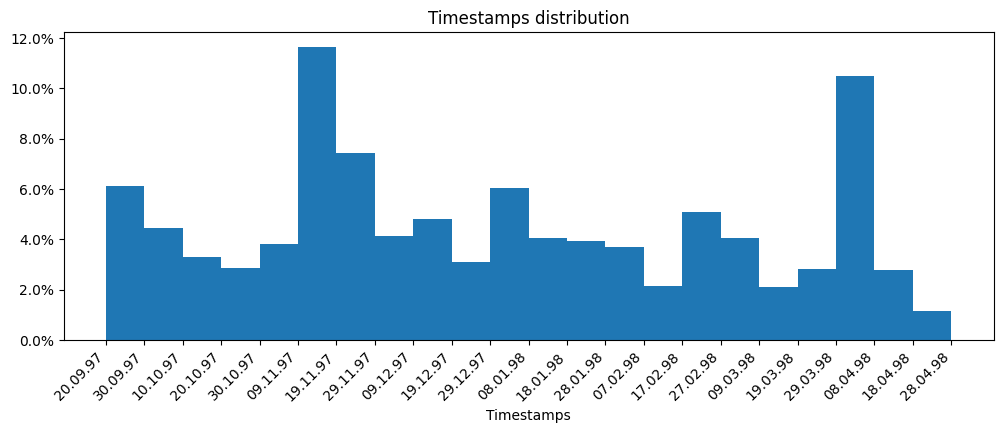

In [432]:
plot_dist(
    u_data.timestamp,
    'Timestamps distribution',
    'Timestamps',
    step=10,
    values_range=(
        m_dates.date2num(u_data.timestamp.to_numpy().min()),
        m_dates.date2num(u_data.timestamp.to_numpy().max()),
    )
)

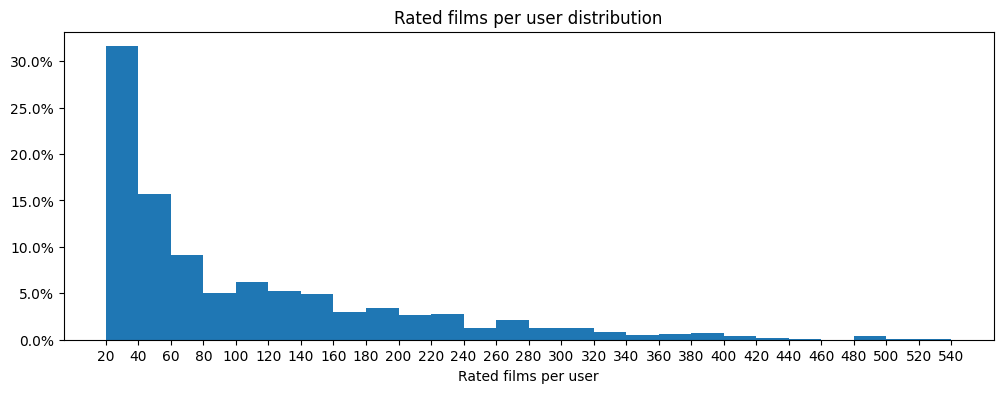

In [433]:
rated_films_per_user = u_data.groupby('user_id')['item_id'].apply(list).apply(len)
plot_dist(
    rated_films_per_user,
    'Rated films per user distribution',
    'Rated films per user',
    step=20,
    values_range=(
        rated_films_per_user.min(),
        rated_films_per_user.max() - 200
    )
)

In [434]:
def plot_counts(labels: list[Union[str, int]],
                counts: list[int],
                x_label: Optional[str] = None,
                title: Optional[str] = None,
                rotation: int = 45):
    fig: plt.Figure
    ax: plt.Axes
    fig, ax = plt.subplots(figsize=(14, 4))

    if isinstance(labels[0], str):
        x_coordinates = np.arange(len(labels))
        ax.bar(x_coordinates, counts, align='center')
        ax.set_xticks(x_coordinates, counts, rotation=rotation)
        ax.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
        ax.xaxis.set_major_formatter(plt.FixedFormatter(labels))
    else:
        ax.bar(labels, counts, align='center')
        ax.set_xticks(labels)

    if title:
        ax.set_title(title)
    if x_label:
        ax.set_xlabel(x_label)

    plt.show()

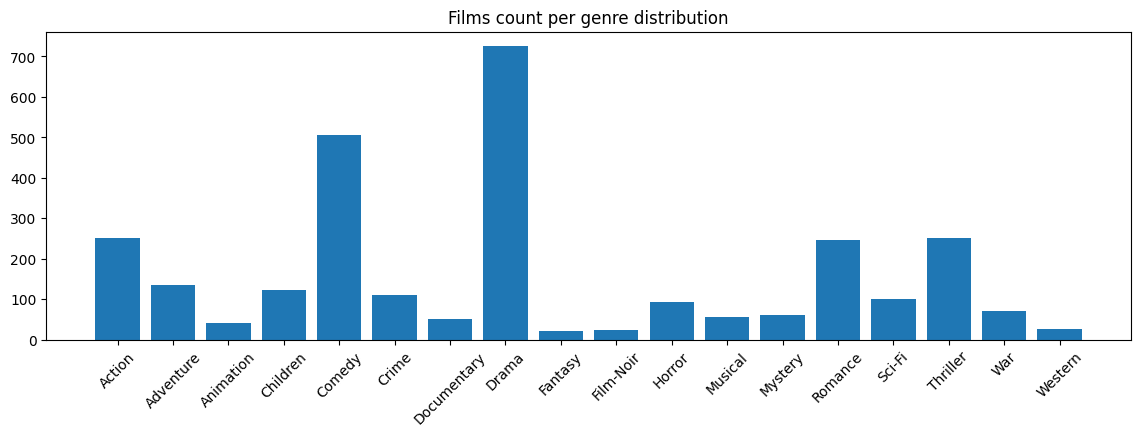

In [435]:
genres = u_item_columns[6:]
genres_count = []
for genre in genres:
    genres_count.append(
        len(u_item[u_item[genre] == 1])
    )

plot_counts(genres, genres_count, title="Films count per genre distribution")

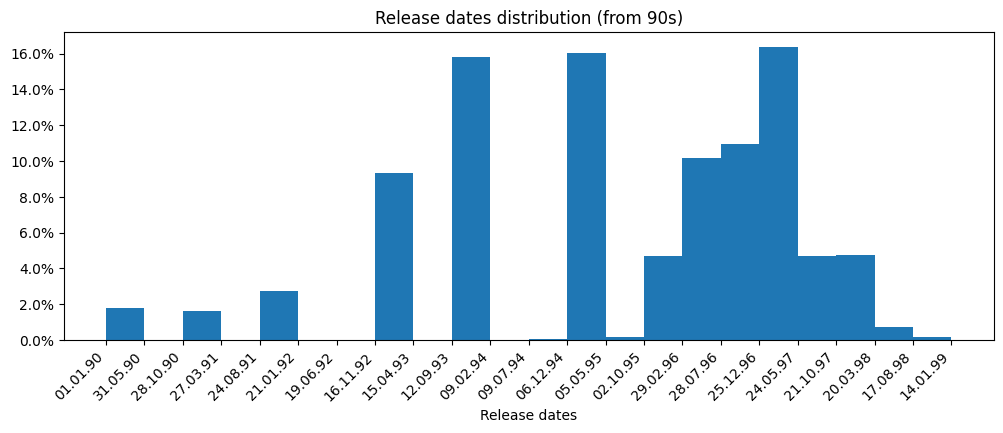

In [436]:
release_dates = u_item['release date'].apply(
    lambda x: datetime.strptime(x, "%d-%b-%Y") if isinstance(x, str) else datetime(1995, 1, 1)
)
release_dates = release_dates[release_dates >= datetime(1990, 1, 1)]

plot_dist(
    release_dates,
    'Release dates distribution (from 90s)',
    'Release dates',
    step=150,
    values_range=(
        m_dates.date2num(release_dates.to_numpy().min()),
        m_dates.date2num(release_dates.to_numpy().max()),
    )
)

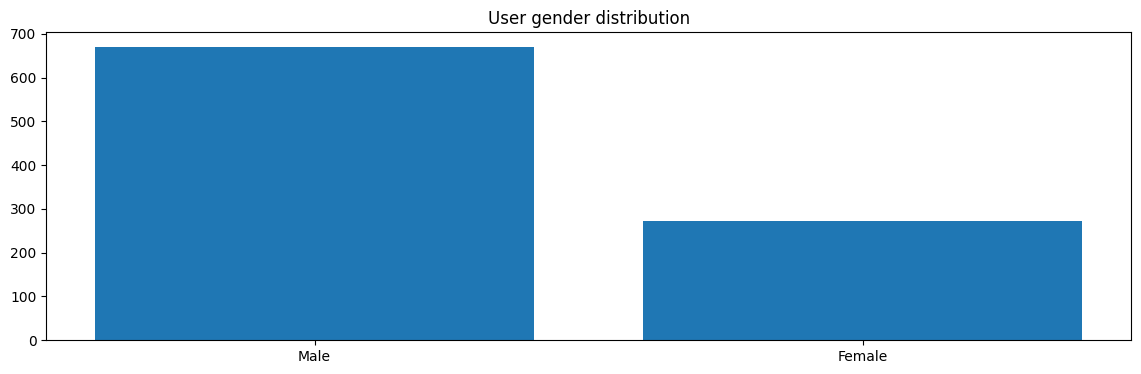

In [437]:
genders_count = [
    len(u_user.gender[u_user.gender == 'M']),
    len(u_user.gender[u_user.gender == 'F']),
]
genders = ['Male', 'Female']

plot_counts(genders, genders_count, title='User gender distribution', rotation=0)

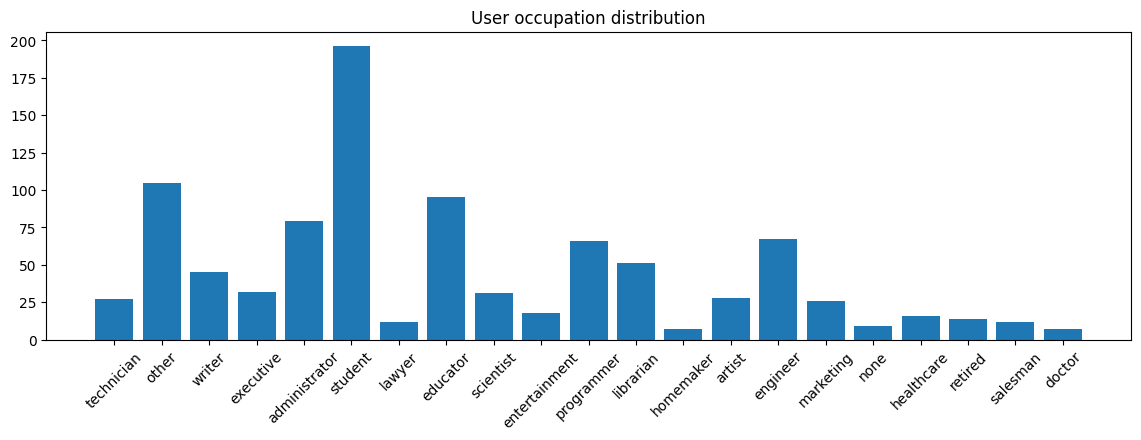

In [438]:
occupations = u_user.occupation.unique().tolist()
occupations_count = []
for occupation in occupations:
    occupations_count.append(
        len(u_user[u_user.occupation == occupation])
    )

plot_counts(occupations, occupations_count, title='User occupation distribution')

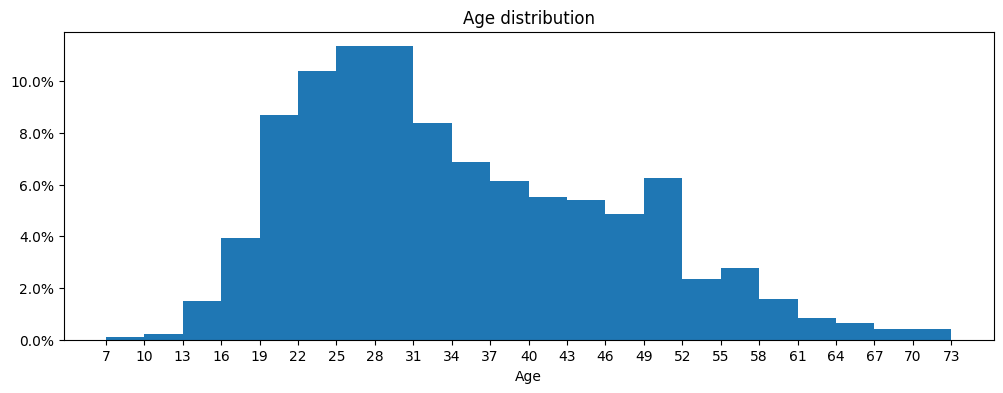

In [439]:
plot_dist(
    u_user.age,
    "Age distribution",
    "Age",
    step=3,
    values_range=(
        u_user.age.min(), 
        u_user.age.max()
    )
)

In [440]:
u_data_user = pd.merge(u_data, u_user, on='user_id')
u_data_user.head()

,user_id,item_id,rating,timestamp,age,gender,occupation,zip code
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105
1,196,393,4,1997-12-04 16:11:03,49,M,writer,55105
2,196,381,4,1997-12-04 16:08:48,49,M,writer,55105
3,196,251,3,1997-12-04 16:01:14,49,M,writer,55105
4,196,655,5,1997-12-04 16:09:53,49,M,writer,55105


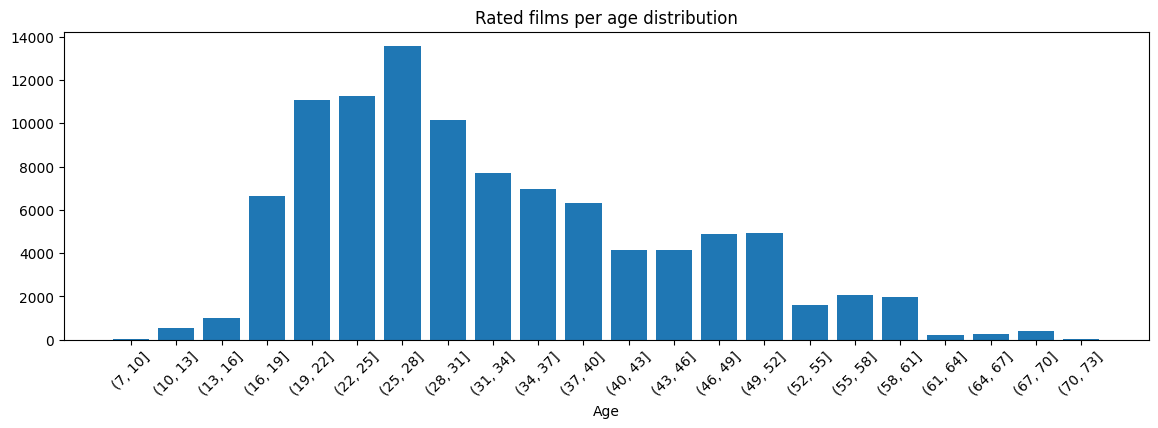

In [441]:
ages_bins = np.arange(7, 76, 3)
rated_films_per_age: pd.Series = (
    u_data_user.groupby('age')['item_id']
    .apply(list)
    .apply(len)
)
rated_films_per_age: pd.Series = rated_films_per_age.groupby(
    pd.cut(
        rated_films_per_age.index, 
        ages_bins,
    ),
    observed=False,
).sum()

plot_counts(
    rated_films_per_age.index.to_series().apply(str).values, 
    rated_films_per_age.values, 
    title="Rated films per age distribution",
    x_label="Age",
)

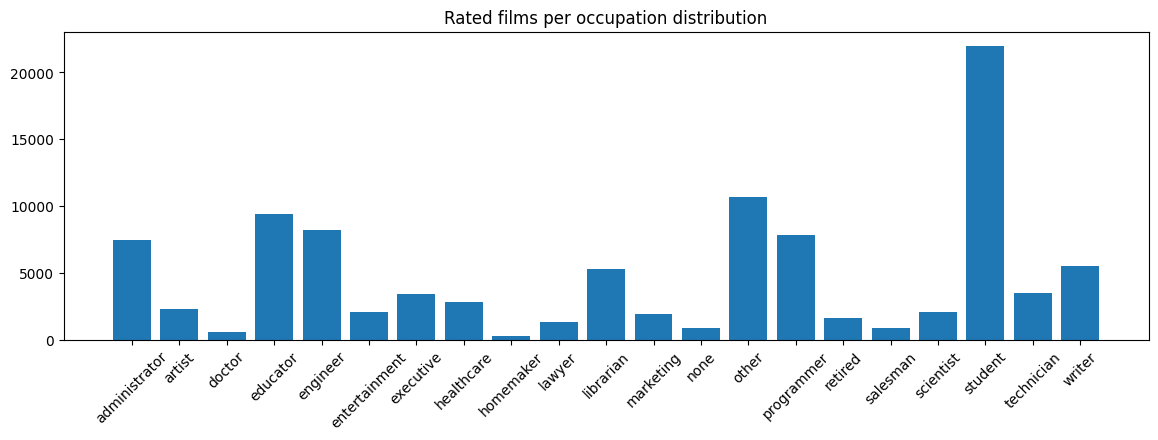

In [442]:
rated_films_per_occupation: pd.Series = (
    u_data_user.groupby('occupation')['item_id']
    .apply(list)
    .apply(len)
)

plot_counts(
    rated_films_per_occupation.index, 
    rated_films_per_occupation.values, 
    title="Rated films per occupation distribution",
)

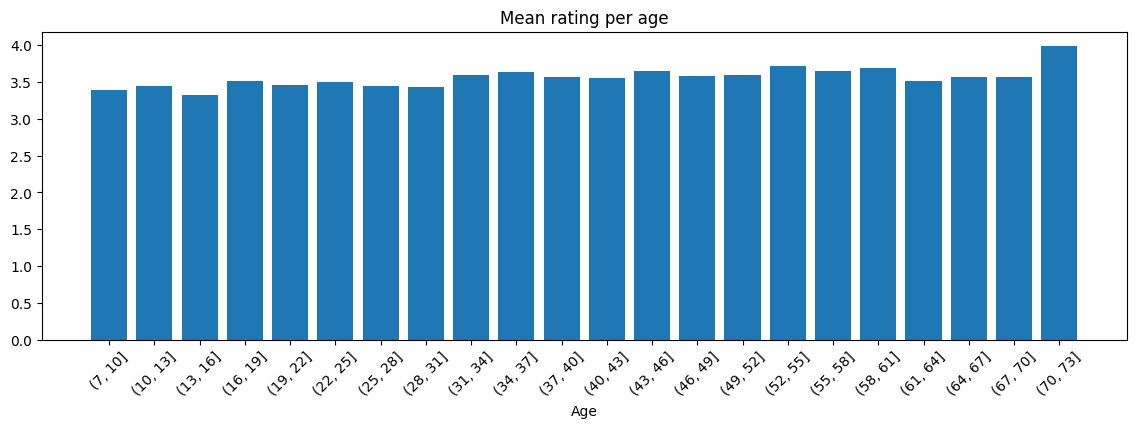

In [443]:
mean_rating_per_age: pd.Series = u_data_user.groupby(
    pd.cut(
        u_data_user.age, 
        ages_bins,
    ),
    observed=False,
)['rating'].mean()

plot_counts(
    mean_rating_per_age.index.to_series().apply(str).values, 
    mean_rating_per_age.values, 
    title="Mean rating per age",
    x_label="Age",
)

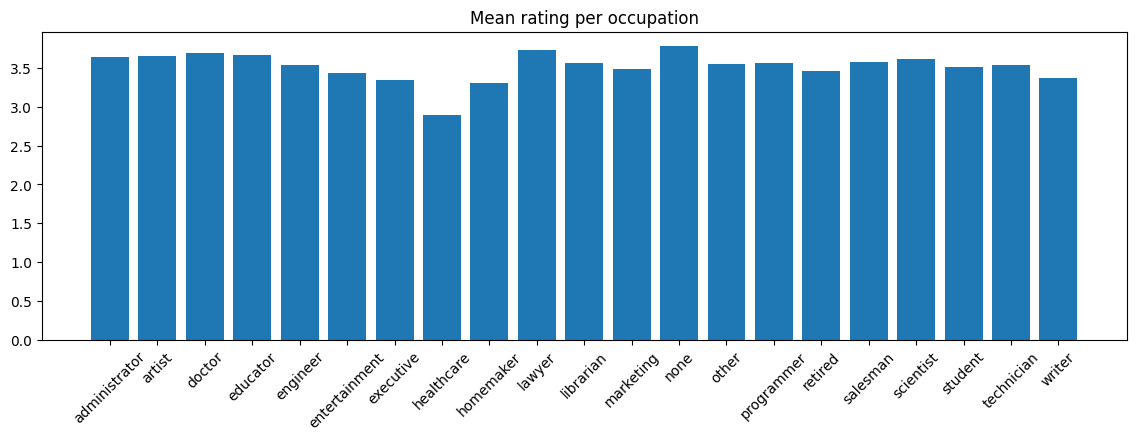

In [444]:
mean_rating_per_occupation: pd.Series = u_data_user.groupby('occupation')['rating'].mean()

plot_counts(
    mean_rating_per_occupation.index, 
    mean_rating_per_occupation.values, 
    title="Mean rating per occupation",
)

In [445]:
u_data_user_item = pd.merge(u_data_user, u_item, on='item_id')
u_data_user_item.head()

,user_id,item_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,1998-02-01 04:37:08,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,1997-12-28 00:16:10,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,1998-03-27 21:14:21,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,1997-10-01 23:06:30,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [446]:
threshold = 15
title_occupation_mean_rating: pd.DataFrame = (
    u_data_user_item
    .groupby(['movie_title', 'occupation'])['rating']
    .apply(list)
    .reset_index(level=[0,1])
)
title_occupation_mean_rating = title_occupation_mean_rating[
    title_occupation_mean_rating['movie_title'] != 'unknown'
]
title_occupation_mean_rating = title_occupation_mean_rating[
    title_occupation_mean_rating['rating'].map(len) > threshold
]
title_occupation_mean_rating['rating'] = title_occupation_mean_rating['rating'].apply(np.mean)

title_occupation_mean_rating.head(10)

,movie_title,occupation,rating
26,101 Dalmatians (1996),student,3.160000
31,12 Angry Men (1957),educator,4.500000
40,12 Angry Men (1957),other,4.187500
44,12 Angry Men (1957),student,4.210526
74,2 Days in the Valley (1996),other,3.062500
78,2 Days in the Valley (1996),student,3.380952
97,2001: A Space Odyssey (1968),administrator,4.040000
100,2001: A Space Odyssey (1968),educator,3.857143
101,2001: A Space Odyssey (1968),engineer,4.000000
106,2001: A Space Odyssey (1968),librarian,3.750000


In [447]:
most_liked_by_occupation = title_occupation_mean_rating.groupby('occupation')[['movie_title', 'rating']].max()
most_liked_by_occupation.head(100)

,movie_title,rating
occupation,,
administrator,"Wizard of Oz, The (1939)",4.631579
artist,Star Wars (1977),4.666667
educator,Young Frankenstein (1974),4.647059
engineer,Young Frankenstein (1974),4.600000
executive,Twelve Monkeys (1995),4.470588
librarian,When Harry Met Sally... (1989),4.684211
marketing,"English Patient, The (1996)",3.764706
other,Young Frankenstein (1974),4.729730
programmer,Young Frankenstein (1974),4.764706
